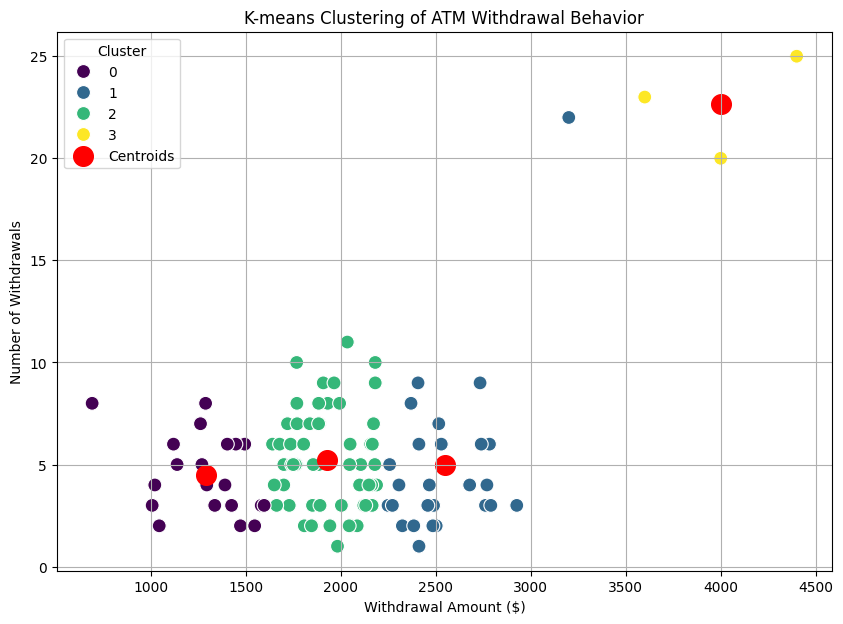

In [2]:
# Python code for K-means clustering visualization using seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(42)
withdrawal_amounts = np.random.normal(2000, 500, 100)
withdrawal_counts = np.random.poisson(5, 100)

# Add outliers
withdrawal_amounts = np.concatenate([withdrawal_amounts, [4000, 3200, 3600, 4400]])
withdrawal_counts = np.concatenate([withdrawal_counts, [20, 22, 23, 25]])

# Create DataFrame
data_df = pd.DataFrame({
    'withdrawal_amount': withdrawal_amounts,
    'withdrawal_count': withdrawal_counts
})

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_df['cluster'] = kmeans.fit_predict(data_df)

# Visualization with seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_df, x='withdrawal_amount', y='withdrawal_count',
                hue='cluster', palette='viridis', s=100, marker='o')

# Plot centroids separately
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroids')

# Titles and labels
plt.title('K-means Clustering of ATM Withdrawal Behavior')
plt.xlabel('Withdrawal Amount ($)')
plt.ylabel('Number of Withdrawals')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
